In [55]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import requests
from shapely.geometry import Point, MultiPolygon

%pylab inline
plt.figsize=(10,10)

Populating the interactive namespace from numpy and matplotlib


## I. Loading and processing stations data

In [30]:
url_stations = 'http://www.citibikenyc.com/stations/json'
json_stations = requests.get(url_stations).json()

stations = pd.DataFrame(json_stations['stationBeanList'])
stations.head(2)

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,7,32,,72,,2015-10-04 05:36:10 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,29,3,,79,,2015-10-04 05:36:51 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33


In [31]:
stations['geometry'] = stations.apply(lambda z: Point(z.longitude, z.latitude), axis=1)
stations = gp.GeoDataFrame(stations)

## II. Loading Boundaries 

In [32]:
boroughs = gp.read_file('/Users/casy/Dropbox/CUSP/1_1_PUI/PUI_Bycicle_Research/data/nybb_15c/nybb.shp')
boroughs.to_crs(epsg=4236, inplace=True)

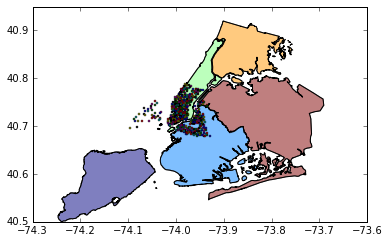

In [33]:
boroughs.plot();
stations.plot();

## III. Categorise stations by borough


In [34]:
def BoroIntersect(boro):
    global stations
#     print boro.BoroCode
    bName = boro.BoroName
    p = MultiPolygon(boro.geometry)

    stations[bName] = stations.intersects(p)

boroughs.apply(lambda b: BoroIntersect(b),1);       

In [35]:
def getBName(station):
    bs = [u'Brooklyn', u'Manhattan', u'Bronx', u'Queens', u'Staten Island']
    name = None
    for b in bs:
        if station[b]: name = b

    return name

stations['Boro']= stations.apply(lambda x: getBName(x), 1);
stations['Boro'].value_counts()

Manhattan    248
Brooklyn     137
Queens         8
dtype: int64

In [36]:
stations.drop([u'Brooklyn', u'Manhattan', u'Bronx', u'Queens', u'Staten Island'], axis=1, inplace=True)
stations.columns

Index([             u'altitude',        u'availableBikes',
              u'availableDocks',                  u'city',
                          u'id',              u'landMark',
       u'lastCommunicationTime',              u'latitude',
                    u'location',             u'longitude',
                  u'postalCode',            u'stAddress1',
                  u'stAddress2',           u'stationName',
                   u'statusKey',           u'statusValue',
                 u'testStation',            u'totalDocks',
                    u'geometry',                  u'Boro'],
      dtype='object')

In [38]:
print 'Before:', len(stations)
stations = stations[pd.notnull(stations['Boro'])]
print 'After:', len(stations)

Before: 508
After: 393


In [57]:
stations.head(10)

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks,geometry,Boro
1,,29,3,,79,,2015-10-04 05:36:51 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33,POINT (-74.00666661 40.71911552),Manhattan
2,,19,8,,82,,2015-10-04 05:36:23 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27,POINT (-74.00016545 40.71117416),Manhattan
3,,15,45,,83,,2015-10-04 05:35:27 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62,POINT (-73.97632328 40.68382604),Brooklyn
5,,14,5,,119,,2015-10-04 05:33:14 PM,40.696089,,-73.978034,,Park Ave & St Edwards St,,Park Ave & St Edwards St,1,In Service,False,19,POINT (-73.97803415 40.69608941),Brooklyn
6,,2,17,,120,,2015-10-04 05:36:57 PM,40.686768,,-73.959282,,Lexington Ave & Classon Ave,,Lexington Ave & Classon Ave,1,In Service,False,19,POINT (-73.95928168 40.68676793),Brooklyn
8,,0,29,,128,,2015-09-24 09:23:40 AM,40.727103,,-74.002971,,MacDougal St & Prince St,,MacDougal St & Prince St,3,Not In Service,False,30,POINT (-74.00297088000001 40.72710258),Manhattan
9,,33,13,,137,,2015-10-04 05:36:06 PM,40.761628,,-73.972924,,E 56 St & Madison Ave,,E 56 St & Madison Ave,1,In Service,False,46,POINT (-73.97292400000001 40.761628),Manhattan
10,,13,11,,143,,2015-10-04 05:34:57 PM,40.692395,,-73.993379,,Clinton St & Joralemon St,,Clinton St & Joralemon St,1,In Service,False,24,POINT (-73.99337909 40.69239502),Brooklyn
11,,0,18,,144,,2015-10-04 05:33:24 PM,40.698399,,-73.980689,,Nassau St & Navy St,,Nassau St & Navy St,1,In Service,False,19,POINT (-73.98068914 40.69839895),Brooklyn
14,,3,28,,150,,2015-10-04 05:35:56 PM,40.720874,,-73.980858,,E 2 St & Avenue C,,E 2 St & Avenue C,1,In Service,False,31,POINT (-73.98085795 40.7208736),Manhattan


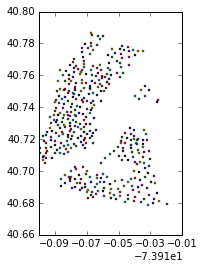

In [56]:
stations.plot(column='Boro',colormap='cubehelix', alpha=0.5, categorical=True)

In [59]:
with open("/Users/casy/Dropbox/CUSP/1_1_PUI/PUI_Bycicle_Research/data/stations.geojson",'w') as gj:
    gj.write(stations.to_json())

In [ ]:
stations/